In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn
from hypernetworks.utils.HTSpaces import get_space
from hypernetworks.utils.HTSearch import what_is_it

from IPython.display import Image, display
parser = load_parser()

Tail={~tail, ~notail}^N
Cat=<~Breed, Sex, FurColour, Body, Legs, Tail, CatHead>^N
Sex={~male, ~female}^N
FurColour={~black, ~beige, ~white, ~brown}^N
Body={~fat, ~skinny, ~average}^N
Legs=<~frontLeft, ~frontRight, ~rearLeft, ~rearRight>^N
CatHead=<Ears, Eyes, ~mouth, ~whiskers>^N
EyeColour={~brown, ~blue, ~green}^N
Ears=<leftEar, rightEar>^N
Eyes=<leftEye, rightEye>^N
DogHead=!<Ears, Eyes, ~mouth>^N
leftEar=<~left, FurColour>^N
rightEar=<~right, FurColour>^N
leftEye=<~left, EyeColour>^N
rightEye=<~right, EyeColour>^N
Dog=<~Breed, Sex, FurColour, Body, Legs, ~tail, DogHead>^N



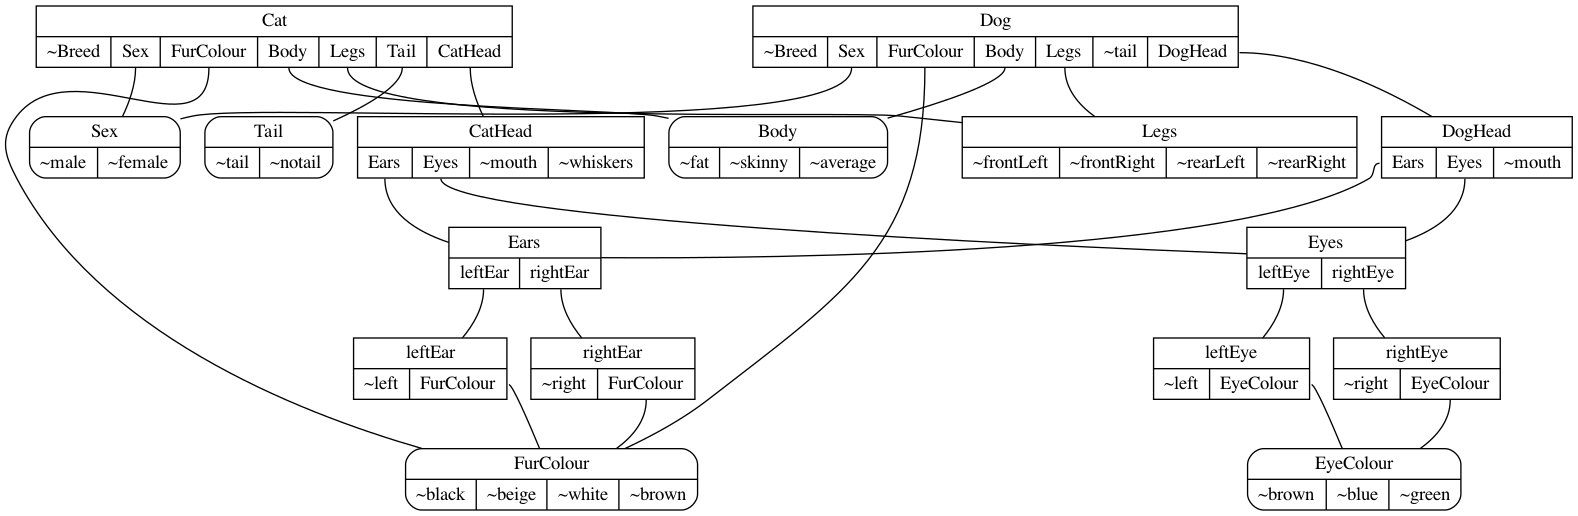

In [2]:
cat_hn = Hypernetwork()

compile_hn(cat_hn, parser, """
    Cat=<~Breed, Sex, FurColour, Body, Legs, Tail={~tail, ~notail}, CatHead>

    FurColour={~black, ~beige, ~white, ~brown}
    EyeColour={~brown, ~blue, ~green}
    Body={~fat, ~skinny, ~average}
    CatHead=<Ears, Eyes, ~mouth, ~whiskers>
    DogHead=!<Ears, Eyes, ~mouth>
    Ears=<leftEar=<~left, FurColour>, rightEar=<~right, FurColour>>
    Eyes=<leftEye=<~left, EyeColour>, rightEye=<~right, EyeColour>>
    Legs=<~frontLeft, ~frontRight, ~rearLeft, ~rearRight>
    tail=<~length>
    Sex={~male, ~female}
    Dog=<~Breed, Sex, FurColour, Body, Legs, ~tail, DogHead>
""")

print(cat_hn)

draw_hn(cat_hn, fname="/tmp/cat", view=False)
Image(filename='/tmp/cat.png', width=1200, height=1200)

{'rightEye': [<hypernetworks.utils.HTPaths.HsPath object at 0x7ffac8798cd0>]}
rightEye=<~right, EyeColour>^N
CatHead=<Ears, Eyes, ~mouth, ~whiskers>^N
Eyes=<leftEye, rightEye>^N
Cat=<~Breed, Sex, FurColour, Body, Legs, Tail, CatHead>^N



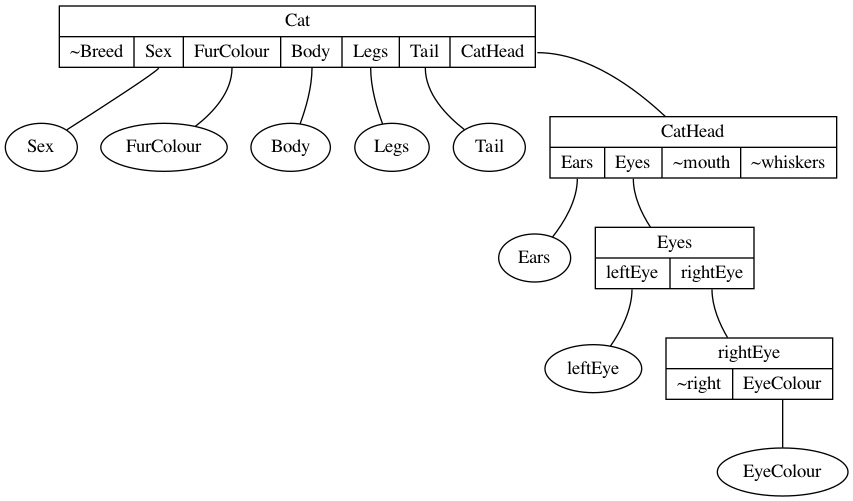

In [3]:
find = get_space(cat_hn, True, False, "Cat", "rightEye")

if find:
    print(find)

draw_hn(find, fname="/tmp/cat2", view=False)
Image(filename='/tmp/cat2.png', width=700, height=500)

In [4]:
isA = what_is_it(cat_hn, True, "whiskers", "brown")
print(isA)

{'Cat', 'CatHead'}
['Cat', 'CatHead']
